# Assignment 6

### 1.复习上课内容以及复现课程代码

在本部分，你需要复习上课内容和课程代码后，自己复现课程代码。

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.patches as mpatches

In [2]:
def tf_reset():
    try:
        sess.close()
    except:
        pass
    tf.reset_default_graph()
    return tf.Session()

#### What is Tensorflow

In [3]:
sess = tf_reset()

a = tf.constant(1.0)
b= tf.constant(2.0)

c = a + b
c_run = sess.run(c)
print(f'c = {c_run}')

c = 3.0


#### How to input data

In [4]:
sess = tf_reset()

a = tf.placeholder(dtype=tf.float32, shape=[1], name='a_placeholder')
b = tf.placeholder(dtype=tf.float32, shape=[1], name='b_placeholder')

c = a+b 

c0_run = sess.run(c, feed_dict={a:[1.0],b:[2.0]})
c1_run = sess.run(c, feed_dict={a: [2.0], b: [4.0]})

print(f'c = {c0_run}')
print(f'c = {c1_run}')

c = [3.]
c = [6.]


In [5]:
sess = tf_reset()


a = tf.placeholder(dtype=tf.float32, shape=[None], name='a_placeholder')
b = tf.placeholder(dtype=tf.float32, shape=[None], name='b_placeholder')

c = a + b


c0_run = sess.run(c, feed_dict={a: [1.0], b: [2.0]})
c1_run = sess.run(c, feed_dict={a: [1.0, 2.0], b: [2.0, 4.0]})

print(f'c = {c0_run}')
print(f'c = {c1_run}')

c = [3.]
c = [3. 6.]


#### How to perform computations

In [6]:
sess = tf_reset()

# inputs
a = tf.constant([[-1.], [-2.], [-3.]], dtype=tf.float32)
b = tf.constant([[1., 2., 3.]], dtype=tf.float32)

a_run, b_run = sess.run([a, b])
print('a:\n {0}'.format(a_run))
print('b:\n {0}'.format(b_run))

a:
 [[-1.]
 [-2.]
 [-3.]]
b:
 [[1. 2. 3.]]


In [7]:
c = b + b

c_run = sess.run(c)
print('b:\n{0}'.format(b_run))
print('c:\n{0}'.format(c_run))

b:
[[1. 2. 3.]]
c:
[[2. 4. 6.]]


In [8]:
c = a + b

c_run = sess.run(c)
print('a:\n{0}'.format(a_run))
print('b:\n{0}'.format(b_run))
print('c:\n{0}'.format(c_run))

a:
[[-1.]
 [-2.]
 [-3.]]
b:
[[1. 2. 3.]]
c:
[[ 0.  1.  2.]
 [-1.  0.  1.]
 [-2. -1.  0.]]


In [9]:
c_elementwise = a * b
c_matmul = tf.matmul(b, a)

c_elementwise_run, c_matmul_run = sess.run([c_elementwise, c_matmul])
print('a:\n{0}'.format(a_run))
print('b:\n{0}'.format(b_run))
print('c_elementwise:\n{0}'.format(c_elementwise_run))
print('c_matmul: \n{0}'.format(c_matmul_run))

a:
[[-1.]
 [-2.]
 [-3.]]
b:
[[1. 2. 3.]]
c_elementwise:
[[-1. -2. -3.]
 [-2. -4. -6.]
 [-3. -6. -9.]]
c_matmul: 
[[-14.]]


In [10]:
c0 = b + b
c1 = c0 + 1

c0_run, c1_run = sess.run([c0, c1])
print('b:\n{0}'.format(b_run))
print('c0:\n{0}'.format(c0_run))
print('c1:\n{0}'.format(c1_run))

b:
[[1. 2. 3.]]
c0:
[[2. 4. 6.]]
c1:
[[3. 5. 7.]]


In [11]:
c = tf.reduce_mean(b)

c_run = sess.run(c)
print('b:\n{0}'.format(b_run))
print('c:\n{0}'.format(c_run))

b:
[[1. 2. 3.]]
c:
2.0


### How to create variables

In [12]:
sess = tf_reset()


b = tf.constant([[1., 2., 3.]], dtype=tf.float32)

sess = tf.Session()

b_run = sess.run(b)
print('b:\n{0}'.format(b_run))

b:
[[1. 2. 3.]]


In [13]:
var_init_value = [[12.0,4.0,6.0]]
var = tf.get_variable(name="myvar",
                     shape=[1,3],
                     dtype=tf.float32,
                     initializer=tf.constant_initializer(var_init_value))
print(var)

<tf.Variable 'myvar:0' shape=(1, 3) dtype=float32_ref>


In [14]:
print(tf.global_variables())

[<tf.Variable 'myvar:0' shape=(1, 3) dtype=float32_ref>]


In [15]:
sess.run(var)
#如何查看变量当前的值呢？？？

FailedPreconditionError: Attempting to use uninitialized value myvar
	 [[Node: _retval_myvar_0_0 = _Retval[T=DT_FLOAT, index=0, _device="/job:localhost/replica:0/task:0/device:CPU:0"](myvar)]]

In [16]:
c = b + var
print(f"{b},{var},{c}")

Tensor("Const:0", shape=(1, 3), dtype=float32),<tf.Variable 'myvar:0' shape=(1, 3) dtype=float32_ref>,Tensor("add:0", shape=(1, 3), dtype=float32)


In [17]:
init_op = tf.global_variables_initializer()
sess.run(init_op)

In [18]:
c_run = sess.run(c)

print('b:\n{0}'.format(b_run))
print('var:\n{0}'.format(var_init_value))
print('c:\n{0}'.format(c_run))

b:
[[1. 2. 3.]]
var:
[[12.0, 4.0, 6.0]]
c:
[[13.  6.  9.]]


#### How to train a neural network for a simple regression problem

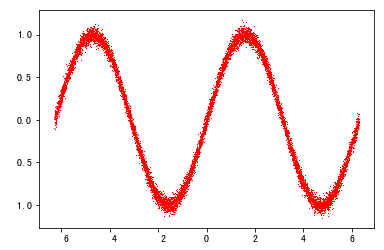

In [19]:
inputs = np.linspace(-2*np.pi, 2*np.pi, 10000)[:, None]
# outputs = np.sin(inputs) + 0.05 * np.random.normal(size=len(inputs),1)
outputs = np.sin(inputs) + 0.05 * np.random.normal(size=[len(inputs),1])

plt.scatter(inputs[:, 0], outputs[:, 0], s=0.1, color='r', marker='*')

In [20]:
sess = tf_reset()

def create_model():
    # create inputs
    input_ph = tf.placeholder(dtype=tf.float32, shape=[None, 1])
    output_ph = tf.placeholder(dtype=tf.float32, shape=[None, 1])

    # create variables
    W0 = tf.get_variable(name='W0', shape=[1, 20], initializer=tf.contrib.layers.xavier_initializer())
    W1 = tf.get_variable(name='W1', shape=[20, 20], initializer=tf.contrib.layers.xavier_initializer())
    W2 = tf.get_variable(name='W2', shape=[20, 1], initializer=tf.contrib.layers.xavier_initializer())

    b0 = tf.get_variable(name='b0', shape=[20], initializer=tf.constant_initializer(0.))
    b1 = tf.get_variable(name='b1', shape=[20], initializer=tf.constant_initializer(0.))
    b2 = tf.get_variable(name='b2', shape=[1], initializer=tf.constant_initializer(0.))
    
    
    weights = [W0,W1,W2]
    biases = [b0,b1,b2]
    activations = [tf.nn.relu,tf.nn.relu, None]
    
    # create computation graph
    layer = input_ph
    for W, b, activation in zip(weights, biases, activations):
        layer = tf.matmul(layer, W) + b
        if activation is not None:
            layer = activation(layer)
    output_pred = layer
    
    return input_ph, output_ph, output_pred
    
input_ph, output_ph, output_pred = create_model()

mse = tf.reduce_mean(0.5*tf.square(output_pred - output_ph))

opt = tf.train.AdamOptimizer().minimize(loss=mse)

sess.run(tf.global_variables_initializer())

saver = tf.train.Saver()

batch_size = 32

for training_step in range(10000):
    # get a random subset of the training data
    indices = np.random.randint(low=0, high=len(inputs), size=batch_size)
    input_batch = inputs[indices]
    output_batch = outputs[indices]
    
    # run the optimizer and get the mse
    _, mse_run = sess.run([opt, mse], feed_dict={input_ph: input_batch, output_ph: output_batch})
    
    # print the mse every so often
    if training_step % 1000 == 0:
        print('{0:04d} mse: {1:.3f}'.format(training_step, mse_run))
        saver.save(sess, './model.ckpt')

0000 mse: 0.473
1000 mse: 0.057
2000 mse: 0.050
3000 mse: 0.034
4000 mse: 0.009
5000 mse: 0.004
6000 mse: 0.004
7000 mse: 0.003
8000 mse: 0.002
9000 mse: 0.003


INFO:tensorflow:Restoring parameters from ./model.ckpt


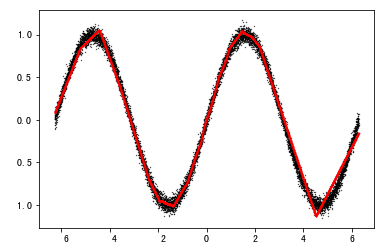

In [21]:
sess = tf_reset()

# create the model
input_ph, output_ph, output_pred = create_model()

# restore the saved model
saver = tf.train.Saver()
saver.restore(sess, "./model.ckpt")

output_pred_run = sess.run(output_pred, feed_dict={input_ph: inputs})

plt.scatter(inputs[:, 0], outputs[:, 0], c='k', marker='o', s=0.1)
plt.scatter(inputs[:, 0], output_pred_run[:, 0], c='r', marker='o', s=0.1)

### c尝试不同的优化器--GradientDescentOptimizer

In [26]:
sess = tf_reset()

def create_model():
    # create inputs
    input_ph = tf.placeholder(dtype=tf.float32, shape=[None, 1])
    output_ph = tf.placeholder(dtype=tf.float32, shape=[None, 1])

    # create variables
    W0 = tf.get_variable(name='W0', shape=[1, 20], initializer=tf.contrib.layers.xavier_initializer())
    W1 = tf.get_variable(name='W1', shape=[20, 20], initializer=tf.contrib.layers.xavier_initializer())
    W2 = tf.get_variable(name='W2', shape=[20, 1], initializer=tf.contrib.layers.xavier_initializer())

    b0 = tf.get_variable(name='b0', shape=[20], initializer=tf.constant_initializer(0.))
    b1 = tf.get_variable(name='b1', shape=[20], initializer=tf.constant_initializer(0.))
    b2 = tf.get_variable(name='b2', shape=[1], initializer=tf.constant_initializer(0.))

    weights = [W0, W1, W2]
    biases = [b0, b1, b2]
    activations = [tf.nn.relu, tf.nn.relu, None]

    # create computation graph
    layer = input_ph
    for W, b, activation in zip(weights, biases, activations):
        layer = tf.matmul(layer, W) + b
        if activation is not None:
            layer = activation(layer)
    output_pred = layer
    
    return input_ph, output_ph, output_pred
    
input_ph, output_ph, output_pred = create_model()
    
# create loss
mse = tf.reduce_mean(0.5 * tf.square(output_pred - output_ph))

# create optimizer
opt = tf.train.GradientDescentOptimizer(learning_rate=0.01).minimize(mse)

# initialize variables
sess.run(tf.global_variables_initializer())
# create saver to save model variables
saver = tf.train.Saver()

# run training
batch_size = 32
for training_step in range(10000):
    # get a random subset of the training data
    indices = np.random.randint(low=0, high=len(inputs), size=batch_size)
    input_batch = inputs[indices]
    output_batch = outputs[indices]
    
    # run the optimizer and get the mse
    _, mse_run = sess.run([opt, mse], feed_dict={input_ph: input_batch, output_ph: output_batch})
    
    # print the mse every so often
    if training_step % 1000 == 0:
        print('{0:04d} mse: {1:.3f}'.format(training_step, mse_run))
        saver.save(sess, '/tmp/model.ckpt')

0000 mse: 0.462
1000 mse: 0.088
2000 mse: 0.090
3000 mse: 0.078
4000 mse: 0.039
5000 mse: 0.064
6000 mse: 0.049
7000 mse: 0.066
8000 mse: 0.060
9000 mse: 0.043


INFO:tensorflow:Restoring parameters from /tmp/model.ckpt


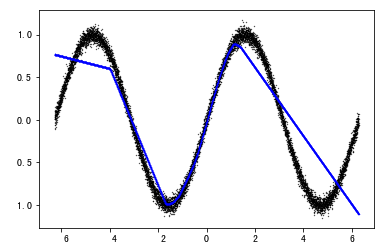

In [27]:
sess = tf_reset()

# create the model
input_ph, output_ph, output_pred = create_model()

# restore the saved model
saver = tf.train.Saver()
saver.restore(sess, "/tmp/model.ckpt")

output_pred_run = sess.run(output_pred, feed_dict={input_ph: inputs})

plt.scatter(inputs[:, 0], outputs[:, 0], c='k', marker='o', s=0.1)
plt.scatter(inputs[:, 0], output_pred_run[:, 0], c='b', marker='*', s=0.1)

### 不同优化器--AdadeltaOptimizer

0000 mse: 0.393
1000 mse: 0.261
2000 mse: 0.250
3000 mse: 0.274
4000 mse: 0.238
5000 mse: 0.189
6000 mse: 0.232
7000 mse: 0.174
8000 mse: 0.210
9000 mse: 0.291
INFO:tensorflow:Restoring parameters from ./model.ckpt


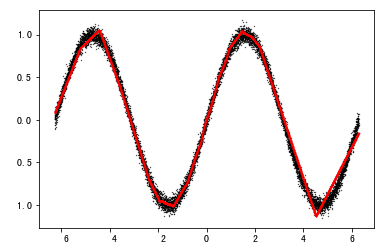

In [28]:
sess = tf_reset()

def create_model():
    # create inputs
    input_ph = tf.placeholder(dtype=tf.float32, shape=[None, 1])
    output_ph = tf.placeholder(dtype=tf.float32, shape=[None, 1])

    # create variables
    W0 = tf.get_variable(name='W0', shape=[1, 20], initializer=tf.contrib.layers.xavier_initializer())
    W1 = tf.get_variable(name='W1', shape=[20, 20], initializer=tf.contrib.layers.xavier_initializer())
    W2 = tf.get_variable(name='W2', shape=[20, 1], initializer=tf.contrib.layers.xavier_initializer())

    b0 = tf.get_variable(name='b0', shape=[20], initializer=tf.constant_initializer(0.))
    b1 = tf.get_variable(name='b1', shape=[20], initializer=tf.constant_initializer(0.))
    b2 = tf.get_variable(name='b2', shape=[1], initializer=tf.constant_initializer(0.))

    weights = [W0, W1, W2]
    biases = [b0, b1, b2]
    activations = [tf.nn.relu, tf.nn.relu, None]

    # create computation graph
    layer = input_ph
    for W, b, activation in zip(weights, biases, activations):
        layer = tf.matmul(layer, W) + b
        if activation is not None:
            layer = activation(layer)
    output_pred = layer
    
    return input_ph, output_ph, output_pred
    
input_ph, output_ph, output_pred = create_model()
    
# create loss
mse = tf.reduce_mean(0.5 * tf.square(output_pred - output_ph))

# create optimizer
opt = tf.train.AdadeltaOptimizer(learning_rate=0.01).minimize(mse)

# initialize variables
sess.run(tf.global_variables_initializer())
# create saver to save model variables
saver = tf.train.Saver()

# run training
batch_size = 32
for training_step in range(10000):
    # get a random subset of the training data
    indices = np.random.randint(low=0, high=len(inputs), size=batch_size)
    input_batch = inputs[indices]
    output_batch = outputs[indices]
    
    # run the optimizer and get the mse
    _, mse_run = sess.run([opt, mse], feed_dict={input_ph: input_batch, output_ph: output_batch})
    
    # print the mse every so often
    if training_step % 1000 == 0:
        print('{0:04d} mse: {1:.3f}'.format(training_step, mse_run))
        saver.save(sess, '/tmp/model.ckpt')
        
sess = tf_reset()

# create the model
input_ph, output_ph, output_pred = create_model()

# restore the saved model
saver = tf.train.Saver()
saver.restore(sess, "./model.ckpt")

output_pred_run = sess.run(output_pred, feed_dict={input_ph: inputs})

plt.scatter(inputs[:, 0], outputs[:, 0], c='k', marker='o', s=0.1)
plt.scatter(inputs[:, 0], output_pred_run[:, 0], c='r', marker='o', s=0.1)

结果：不同优化器差距好大呀？？

### Tips and tricks

In [36]:
a = tf.constant(np.random.random((4, 1)))
b = tf.constant(np.random.random((1, 4)))
c = a * b
assert c.get_shape() == (4, 4)

In [37]:
sess = tf_reset()
a = tf.get_variable('I_am_a_variable', shape=[4, 6])
b = tf.get_variable('I_am_a_variable_too', shape=[2, 7])
for var in tf.global_variables():
    print(var.name)

I_am_a_variable:0
I_am_a_variable_too:0


In [38]:
help(tf.reduce_mean)

Help on function reduce_mean in module tensorflow.python.ops.math_ops:

reduce_mean(input_tensor, axis=None, keepdims=None, name=None, reduction_indices=None, keep_dims=None)
    Computes the mean of elements across dimensions of a tensor. (deprecated arguments)
    
    SOME ARGUMENTS ARE DEPRECATED. They will be removed in a future version.
    Instructions for updating:
    keep_dims is deprecated, use keepdims instead
    
    Reduces `input_tensor` along the dimensions given in `axis`.
    Unless `keepdims` is true, the rank of the tensor is reduced by 1 for each
    entry in `axis`. If `keepdims` is true, the reduced dimensions
    are retained with length 1.
    
    If `axis` is None, all dimensions are reduced, and a
    tensor with a single element is returned.
    
    For example:
    
    ```python
    x = tf.constant([[1., 1.], [2., 2.]])
    tf.reduce_mean(x)  # 1.5
    tf.reduce_mean(x, 0)  # [1.5, 1.5]
    tf.reduce_mean(x, 1)  # [1.,  2.]
    ```
    
    Args:
      

In [39]:
help(tf.contrib.layers.fully_connected)

Help on function fully_connected in module tensorflow.contrib.layers.python.layers.layers:

fully_connected(inputs, num_outputs, activation_fn=<function relu at 0x000002D211D57400>, normalizer_fn=None, normalizer_params=None, weights_initializer=<function variance_scaling_initializer.<locals>._initializer at 0x000002D21B56E268>, weights_regularizer=None, biases_initializer=<tensorflow.python.ops.init_ops.Zeros object at 0x000002D21B56B0F0>, biases_regularizer=None, reuse=None, variables_collections=None, outputs_collections=None, trainable=True, scope=None)
    Adds a fully connected layer.
    
    `fully_connected` creates a variable called `weights`, representing a fully
    connected weight matrix, which is multiplied by the `inputs` to produce a
    `Tensor` of hidden units. If a `normalizer_fn` is provided (such as
    `batch_norm`), it is then applied. Otherwise, if `normalizer_fn` is
    None and a `biases_initializer` is provided then a `biases` variable would be
    created a

In [40]:
sess = tf_reset()

# create variables
with tf.variable_scope('layer_0'):
    W0 = tf.get_variable(name='W0', shape=[1, 20], initializer=tf.contrib.layers.xavier_initializer())
    b0 = tf.get_variable(name='b0', shape=[20], initializer=tf.constant_initializer(0.))

with tf.variable_scope('layer_1'):
    W1 = tf.get_variable(name='W1', shape=[20, 20], initializer=tf.contrib.layers.xavier_initializer())
    b1 = tf.get_variable(name='b1', shape=[20], initializer=tf.constant_initializer(0.))
    
with tf.variable_scope('layer_2'):
    W2 = tf.get_variable(name='W2', shape=[20, 1], initializer=tf.contrib.layers.xavier_initializer())
    b2 = tf.get_variable(name='b2', shape=[1], initializer=tf.constant_initializer(0.))

# print the variables
var_names = sorted([v.name for v in tf.global_variables()])
print('\n'.join(var_names))

layer_0/W0:0
layer_0/b0:0
layer_1/W1:0
layer_1/b1:0
layer_2/W2:0
layer_2/b2:0


In [41]:
gpu_device = 0
gpu_frac = 0.5

# make only one of the GPUs visible
import os
os.environ["CUDA_VISIBLE_DEVICES"] = str(gpu_device)

# only use part of the GPU memory
gpu_options = tf.GPUOptions(per_process_gpu_memory_fraction=gpu_frac)
config = tf.ConfigProto(gpu_options=gpu_options)

# create the session
tf_sess = tf.Session(graph=tf.Graph(), config=config)

### 2.回答以下理论题目?

#### 1. Compared to FNN, what is the biggest advantage of CNN?

ans: 参数共享，所以CNN需要训练的参数比FNN少

#### 2. Suppose your input is a 100 by 100 gray image, and you use a convolutional layer with 50 filters that are each 5x5. How many parameters does this hidden layer have (including the bias parameters)? 

ans: (5x5 + 1)*50

#### 3. What are "local invariant" and "parameter sharing" ?

ans:local inveriant  parameter sharing：共享参数

#### 4. Why we use batch normalization ?

ans:  batch normalization 就是对每一个batch 在input的时候或者在每一个layer都做一次标准化，目的是为了让input的数据近视高斯分布，消除梯度消失的情况，增大模型对数据的拟合能力

#### 5. What problem does dropout try to solve ?

ans:  overfitting

#### 6.  Is the following statement correct and why ? "Because pooling layers do not have parameters, they do not affect  the backpropagation(derivatives) calculation"

ans : FALSE,虽然pooling layer不需要参数，但是它会改变feature map的维度

### 3. 实践题

In [29]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

Load the dataset. 

In [30]:
(x_train,y_train),(x_test,y_test) = tf.keras.datasets.cifar10.load_data()

In [31]:
print(x_train.shape, x_test.shape)

(50000, 32, 32, 3) (10000, 32, 32, 3)


In [32]:
y_train[0]

array([6], dtype=uint8)

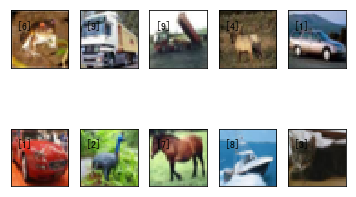

In [33]:
for i in range(1,11):
    plt.subplot(2,5,i)
    plt.imshow(x_train[i-1])
    plt.text(3,10,str(y_train[i-1]))
    plt.xticks([])
    plt.yticks([])
plt.show()

##### It is your time to build your model. Try your best to build a model with good performance on the test set.

In [34]:
max_steps = 50000
image_size = 32
n_classes = 10
filter_size = 5
n_channels = 3
n_filters = 32
batch_size = 500    # 小批量数据大小
fh1_nodes = 128     # 全连接隐藏层1节点数
fh2_nodes = 64      # 隐藏层2
display = 100

In [35]:
y_train[0].tolist()[0]

6

https://blog.csdn.net/nvidiacuda/article/details/83301769

In [36]:
%%time
def onehot(labels):
    n_sample = len(labels)
    n_class = max(labels).tolist()[0] +1
    onehot_labels = np.zeros((n_sample, n_class))
    for i in range(n_sample):
        onehot_labels[i,labels[i].tolist()[0]]=1
    return onehot_labels
 
Y_train = onehot(y_train)
Y_test = onehot(y_test)

Wall time: 176 ms


In [38]:
Y_train[:2]

array([[0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]])

In [ ]:
%%time
 
print(x_train.shape)
print(Y_train.shape)
print(x_test.shape)
print(Y_test.shape)
 
xs = tf.placeholder(tf.float32, [None, 32,32,3])
ys = tf.placeholder(tf.float32, [None, 10])
x_image = tf.reshape(xs, [-1, 32, 32, 3])
 
conv1 = tf.layers.conv2d(x_image, 32, 5, 1, 'same', activation=tf.nn.relu)
poo11 = tf.layers.max_pooling2d(conv1, 3, 2, padding='same')
norm1 = tf.nn.lrn(poo11, 4, bias=1.0, alpha=0.001/9.0, beta=0.75)

conv2 = tf.layers.conv2d(norm1, 64, 5, 1, 'same', activation=tf.nn.relu)
pool2 =tf.layers.max_pooling2d(conv2, 3, 2, padding='same')
norm2 = tf.nn.lrn(pool2, 4, bias=1.0, alpha=0.001/9.0, beta=0.75)

norm2_flat = tf.reshape(norm2, [-1, 8*8*64])
 
fc1 = tf.layers.dense(norm2_flat, 384, activation=tf.nn.relu)
# fc2 = tf.layers.dense(fc1, 192, activation=tf.nn.relu)
output = tf.layers.dense(fc1, 10, activation=tf.nn.softmax)
 
loss= tf.losses.softmax_cross_entropy(onehot_labels=ys,logits=output)
train_step = tf.train.GradientDescentOptimizer(learning_rate=1e-3).minimize(loss)
 
correct_prediction = tf.equal(tf.arg_max(output, 1), tf.arg_max(ys, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

train_acc = []
test_accc = []
batch_size = 100
init = tf.global_variables_initializer()
with tf.Session() as sess:
    sess.run(init)
    total_batch = int(x_train.shape[0]/batch_size)
    for i in range(100):
        for batch in range(total_batch):
            batch_x =x_train[batch*batch_size:(batch+1)*batch_size,:]
            batch_y =Y_train[batch * batch_size:(batch + 1) * batch_size, :]
            sess.run(train_step, feed_dict={xs: batch_x, ys: batch_y})

        acc_train = sess.run(accuracy, feed_dict={xs: x_train, ys: Y_train})
        print("###################")
        acc_test = sess.run(accuracy, feed_dict={xs: x_test, ys: Y_test})
        if i %5 == 0:
            print(f"epoch:{i} the accuraccy on train set:{acc_train}, on test set: {acc_test}")
        train_acc.append(acc_train)
        test_accc.append(acc_test)

(50000, 32, 32, 3)
(50000, 10)
(10000, 32, 32, 3)
(10000, 10)
Instructions for updating:
Use `argmax` instead


不知道为啥，跑了好几天也没有结果，数据量也不是很大呀？？

### 4. Optional 

##### Do you want to build a CNN from scratch ? 

In this optianl part, you will build a cnn network step by step.

In [1]:
import numpy as np
np.random.seed(1)

##### 4.1 Implement a convolution step

Hints: Numpy.sum function might be useful.

In [2]:
def conv_single_step(a_prev_slice,W,b):
    '''
    Apply one filter defined by parameters W on a single slice (a_slice_prev) of the output activation 
    of the previous layer.
    Arguments:
    a_prev_slice: slice of input data (shape=(f,f,n_C_prev))
    W: Weight parameters contained in a window. (shape = (f,f,n_C_prev))
    b: Bias parameters contained in a window. (shape=(1,1,1))
    
    Reutrns:
    
    Z: a scalar value, the result of convolving the sliding window (W, b) on a slice x of the input data 
    '''
    # Element-wise product
    
    s = np.multiply(a_prev_slice,W)
    
    # Sum over s  
    Z = sum(sum(sum([x for x in s])))
    
    # Add bias b to z.
    Z += b
    
    return Z[0,0,0]

In [3]:
np.random.seed(1)
a_slice_prev = np.random.randn(4, 4, 3)
W = np.random.randn(4, 4, 3)
b = np.random.randn(1, 1, 1)

Z = conv_single_step(a_slice_prev, W, b)
print("Z =", Z)

Z = -6.999089450680222


In [38]:
Z[0,0,0]

-6.999089450680222

Use the code above to test your code. If your c
ode is correct, you should be able to get the output shown as below.

<table>
    <tr>
        <td>
            Z
        </td>
        <td>
            -6.99908945068
        </td>
    </tr>

</table>

##### 4.2 Padding

Hints: Numpy.pad function might be useful.

In [4]:
def zero_pad(X, pad):
    """
    Pad with zeros all images of the dataset X. The padding is applied to the height and width of an image, 
    as illustrated in Figure 1.
    
    Argument:
    X: python numpy array of shape (m, n_H, n_W, n_C) representing a batch of m images
    pad: integer, amount of padding around each image on vertical and horizontal dimensions
    
    Returns:
    X_pad: padded image of shape (m, n_H + 2*pad, n_W + 2*pad, n_C)
    """
    m, n_H, n_W, n_C = X.shape
    pad_width = ((0, 0), (pad, pad),(pad, pad),(0, 0))
    X_pad = np.pad(x, pad_width=pad_width, mode='constant', constant_values=0)
    
#     X_pad = np.zeros((4,3,5,4)) # m, n_H + 2*pad, n_W + 2*pad, n_C
#     for d1 in range(x.shape[0]):
#         for d2 in range(x.shape[2]):
#             ndarray=np.pad(x[d1,d2],((1,1),(1,1)),'constant', constant_values=(0,0)) 
#             X_pad[d1,d2] = ndarray
        
    return X_pad

In [49]:
np.random.seed(1)
x = np.random.randn(4, 3, 3, 2)
x_pad = zero_pad(x, 2)
print ("x.shape =\n", x.shape)
print ("x_pad.shape =\n", x_pad.shape)
print ("x[1,1] =\n", x[1,1])
print ("x_pad[1,1] =\n", x_pad[1,1])

x.shape =
 (4, 3, 3, 2)
x_pad.shape =
 (4, 7, 7, 2)
x[1,1] =
 [[ 0.90085595 -0.68372786]
 [-0.12289023 -0.93576943]
 [-0.26788808  0.53035547]]
x_pad[1,1] =
 [[0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]]


Use the code above to test your code. If your code is correct, you should be able to get the output shown as below.

```
x.shape =
 (4, 3, 3, 2)
x_pad.shape =
 (4, 7, 7, 2)
x[1,1] =
 [[ 0.90085595 -0.68372786]
 [-0.12289023 -0.93576943]
 [-0.26788808  0.53035547]]
x_pad[1,1] =
 [[ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]]
```

##### 4.3 Implement a forward propagation in CNN.

Hints: The formulas to calculate the output shapes are :

$$ n_H = \lfloor \frac{n_{H_{prev}} - f + 2 \times pad}{stride} \rfloor +1 $$
$$ n_W = \lfloor \frac{n_{W_{prev}} - f + 2 \times pad}{stride} \rfloor +1 $$
$$ n_C = \text{number of filters used in the convolution}$$

In [7]:
def zero_pad(X, pad):
    """
    """
    m, n_H, n_W, n_C = X.shape
    pad_width = ((0, 0), (pad, pad),(pad, pad),(0, 0))
    X_pad = np.pad(X, pad_width=pad_width, mode='constant', constant_values=0)
    return X_pad
def conv_forward(A_prev, W, b, hparameters):
    """
    Implements the forward propagation for a convolution function
    
    Arguments:
    A_prev: output activations of the previous layer, 
        numpy array of shape (m, n_H_prev, n_W_prev, n_C_prev)
    W: Weights, numpy array of shape (f, f, n_C_prev, n_C)
    b: Biases, numpy array of shape (1, 1, 1, n_C)
    hparameters: python dictionary containing "stride" and "pad"
        
    Returns:
    Z: conv output, numpy array of shape (m, n_H, n_W, n_C)
    cache: cache of values needed for the conv_backward() function
    """
    
    # Get dimensions from A_prev's shape  
    (m, n_H_prev, n_W_prev, n_C_prev) = A_prev.shape
#     print("A_prev: ",A_prev.shape)
    
    # Get dimensions from W's shape 
    (f, f, n_C_prev, n_C) = W.shape
    
    # Get information from "hparameters" 
    stride = hparameters.get('stride',1)
    pad = hparameters.get('pad',1)
    
    # Compute the dimensions of the CONV output volume using the formula given above. 
    # Hint: use int() to apply the 'floor' operation. 
    n_H = int((n_H_prev - f + 2*pad)/stride ) + 1
    n_W = int((n_W_prev - f + 2*pad)/stride ) + 1
    
    # Initialize the output volume Z with zeros.
    Z = np.zeros((m, n_H, n_W, n_C))
    print("Z: ",Z.shape)
    
    # Create A_prev_pad by padding A_prev
#     print("A_prev:",A_prev.shape)
    A_prev_pad = zero_pad(A_prev, pad)
#     print("A_prev_pad: ", A_prev_pad.shape)
    
    for i in range(m):               # loop over the batch of training examples
        a_prev_pad_temp = A_prev_pad[i]               # Select ith training example's padded activation
#         print(a_prev_pad_temp.shape)
        for h in range(n_H):           # loop over vertical axis of the output volume 
            # Find the vertical start and end of the current "slice" 
            vert_start = h
            vert_end = h + f
            
            for w in range(n_W):       # loop over horizontal axis of the output volume
                # Find the horizontal start and end of the current "slice"
                horiz_start = w
                horiz_end = w + f
                
                for c in range(n_C):   # loop over channels (= #filters) of the output volume ??
                                        
                    # Use the corners to define the (3D) slice of a_prev_pad (See Hint above the cell). 
                    a_slice_prev = a_prev_pad_temp[horiz_start:horiz_end,vert_start:vert_end,:]
                    
                    # Convolve the (3D) slice with the correct filter W and bias b, to get back one output neuron. 
                    weights = W[:,:,:,c]
                    biases = b[:, :, :,c]
#                     print(i,"\t",w,"\t",h,"\t",c)
#                     print(a_slice_prev.shape,"\t",weights.shape,"\t",biases.shape)
                    Z[i, h, w, c] = conv_single_step(a_slice_prev,weights,biases)
                                        
    
    # Making sure your output shape is correct
    assert(Z.shape == (m, n_H, n_W, n_C))
    
    # Save information in "cache" for the backprop
    cache = (A_prev, W, b, hparameters)
    
    return Z, cache

In [8]:
np.random.seed(1)
A_prev = np.random.randn(10,5,7,4)
W = np.random.randn(3,3,4,8)
b = np.random.randn(1,1,1,8)
hparameters = {"pad" : 1,
               "stride": 2}

Z, cache_conv = conv_forward(A_prev, W, b, hparameters)
print("Z's mean =\n", np.mean(Z))
print("Z[3,2,1] =\n", Z[3,2,1])
print("cache_conv[0][1][2][3] =\n", cache_conv[0][1][2][3])

Z:  (10, 3, 4, 8)
Z's mean =
 0.29592610717836554
Z[3,2,1] =
 [ -0.48479754   9.778321     6.35727372  -7.54971725   4.31490777
 -12.39028487  -4.94619817   9.42905655]
cache_conv[0][1][2][3] =
 [-1.1191154   1.9560789  -0.3264995  -1.34267579]


In [ ]:
np.random.seed(1)
A_prev = np.random.randn(10,5,7,4)
W = np.random.randn(3,3,4,8)
b = np.random.randn(1,1,1,8)
hparameters = {"pad" : 1,
               "stride": 2}

Z, cache_conv = conv_forward(A_prev, W, b, hparameters)
print("Z's mean =\n", np.mean(Z))
print("Z[3,2,1] =\n", Z[3,2,1])
print("cache_conv[0][1][2][3] =\n", cache_conv[0][1][2][3])

Use the code above to test your code. If your code is correct, you should be able to get the output shown as below.

```
Z's mean =
 0.692360880758
Z[3,2,1] =
 [ -1.28912231   2.27650251   6.61941931   0.95527176   8.25132576
   2.31329639  13.00689405   2.34576051]
cache_conv[0][1][2][3] = [-1.1191154   1.9560789  -0.3264995  -1.34267579]
```

##### 4.4 Pooling layers

Hints: As there\'s no padding, the formulas binding the output shape of the pooling to the input shape is:

$$ n_H = \lfloor \frac{n_{H_{prev}} - f}{stride} \rfloor +1 $$

$$ n_W = \lfloor \frac{n_{W_{prev}} - f}{stride} \rfloor +1 $$

$$ n_C = n_{C_{prev}}$$

In [15]:
def pool_forward(A_prev, hparameters, mode = "max"):
    """
    Implements the forward pass of the pooling layer
    
    Arguments:
    A_prev: Input data, numpy array of shape (m, n_H_prev, n_W_prev, n_C_prev)
    hparameters: python dictionary containing "f" and "stride"
    mode: the pooling mode you would like to use, defined as a string ("max" or "average")
    
    Returns:
    A: output of the pool layer, a numpy array of shape (m, n_H, n_W, n_C)
    cache: cache used in the backward pass of the pooling layer, contains the input and hparameters 
    """
    
    # Get dimensions from the input shape
    (m, n_H_prev, n_W_prev, n_C_prev) = A_prev.shape
    
    # Get hyperparameters from "hparameters"
    f = hparameters["f"]
    stride = hparameters["stride"]
    
    # Define the dimensions of the output
    n_H = int(1 + (n_H_prev - f) / stride)
    n_W = int(1 + (n_W_prev - f) / stride)
    n_C = n_C_prev
    
    # Initialize output matrix A
    A = np.zeros((m, n_H, n_W, n_C))              
    
    for i in range(m):                         # loop over the training examples
        for h in range(n_H):                     # loop on the vertical axis of the output volume
            # Find the vertical start and end of the current "slice" (≈2 lines)
            vert_start = h
            vert_end = h + f
            
            for w in range(n_W):                 # loop on the horizontal axis of the output volume
                # Find the vertical start and end of the current "slice" (≈2 lines)
                horiz_start = w
                horiz_end = w + f
                
                for c in range (n_C):            # loop over the channels of the output volume
                    
                    # Use the corners to define the current slice on the ith training example of A_prev, channel c. (≈1 line)
                    a_prev_slice = A_prev[i,horiz_start:horiz_end,vert_start:vert_end,c]
                    
                    # Compute the pooling operation on the slice. 
                    # Use an if statement to differentiate the modes. 
                    # Use np.max and np.mean.
                    if mode == "max":
                        A[i, h, w, c] = np.max(a_prev_slice)
                    elif mode == "average":
                        A[i, h, w, c] = np.mean(a_prev_slice)
    
    # Store the input and hparameters in "cache" for pool_backward()
    cache = (A_prev, hparameters)
    
    # Making sure your output shape is correct
    assert(A.shape == (m, n_H, n_W, n_C))
    
    return A, cache

In [16]:
np.random.seed(1)
A_prev = np.random.randn(2, 5, 5, 3)
hparameters = {"stride" : 1, "f": 3}

A, cache = pool_forward(A_prev, hparameters)
print("mode = max")
print("A.shape = " + str(A.shape))
print("A =\n", A)
print()
A, cache = pool_forward(A_prev, hparameters, mode = "average")
print("mode = average")
print("A.shape = " + str(A.shape))
print("A =\n", A)

mode = max
A.shape = (2, 3, 3, 3)
A =
 [[[[1.74481176 0.90159072 1.65980218]
   [1.14472371 0.90159072 2.10025514]
   [1.13162939 1.51981682 2.18557541]]

  [[1.74481176 1.46210794 1.65980218]
   [1.14472371 0.90159072 1.65980218]
   [1.13162939 1.51981682 2.18557541]]

  [[1.74481176 1.6924546  1.65980218]
   [1.14472371 1.6924546  1.65980218]
   [1.13162939 1.6924546  2.18557541]]]


 [[[1.19891788 0.84616065 0.82797464]
   [1.96710175 0.84616065 1.27375593]
   [1.96710175 0.86888616 1.27375593]]

  [[0.69803203 0.84616065 1.2245077 ]
   [1.96710175 0.84616065 1.23616403]
   [1.96710175 0.86888616 1.23616403]]

  [[0.69803203 1.12141771 1.2245077 ]
   [1.62765075 1.12141771 1.2245077 ]
   [1.62765075 1.12141771 0.79280687]]]]

mode = average
A.shape = (2, 3, 3, 3)
A =
 [[[[-3.01046719e-02 -3.24021315e-03 -3.36298859e-01]
   [-3.81801899e-01  1.59993515e-02  1.70562706e-01]
   [-3.82680519e-01  2.32579951e-01  6.25997903e-01]]

  [[ 1.43310483e-01  1.93146751e-01 -4.44905196e-01]
   [

In [ ]:
np.random.seed(1)
A_prev = np.random.randn(2, 5, 5, 3)
hparameters = {"stride" : 1, "f": 3}

A, cache = pool_forward(A_prev, hparameters)
print("mode = max")
print("A.shape = " + str(A.shape))
print("A =\n", A)
print()
A, cache = pool_forward(A_prev, hparameters, mode = "average")
print("mode = average")
print("A.shape = " + str(A.shape))
print("A =\n", A)

Use the code above to test your code. If your code is correct, you should be able to get the output shown as below.

```
mode = max
A.shape = (2, 3, 3, 3)
A =
 [[[[ 1.74481176  0.90159072  1.65980218]
   [ 1.74481176  1.46210794  1.65980218]
   [ 1.74481176  1.6924546   1.65980218]]

  [[ 1.14472371  0.90159072  2.10025514]
   [ 1.14472371  0.90159072  1.65980218]
   [ 1.14472371  1.6924546   1.65980218]]

  [[ 1.13162939  1.51981682  2.18557541]
   [ 1.13162939  1.51981682  2.18557541]
   [ 1.13162939  1.6924546   2.18557541]]]


 [[[ 1.19891788  0.84616065  0.82797464]
   [ 0.69803203  0.84616065  1.2245077 ]
   [ 0.69803203  1.12141771  1.2245077 ]]

  [[ 1.96710175  0.84616065  1.27375593]
   [ 1.96710175  0.84616065  1.23616403]
   [ 1.62765075  1.12141771  1.2245077 ]]

  [[ 1.96710175  0.86888616  1.27375593]
   [ 1.96710175  0.86888616  1.23616403]
   [ 1.62765075  1.12141771  0.79280687]]]]

mode = average
A.shape = (2, 3, 3, 3)
A =
 [[[[ -3.01046719e-02  -3.24021315e-03  -3.36298859e-01]
   [  1.43310483e-01   1.93146751e-01  -4.44905196e-01]
   [  1.28934436e-01   2.22428468e-01   1.25067597e-01]]

  [[ -3.81801899e-01   1.59993515e-02   1.70562706e-01]
   [  4.73707165e-02   2.59244658e-02   9.20338402e-02]
   [  3.97048605e-02   1.57189094e-01   3.45302489e-01]]

  [[ -3.82680519e-01   2.32579951e-01   6.25997903e-01]
   [ -2.47157416e-01  -3.48524998e-04   3.50539717e-01]
   [ -9.52551510e-02   2.68511000e-01   4.66056368e-01]]]


 [[[ -1.73134159e-01   3.23771981e-01  -3.43175716e-01]
   [  3.80634669e-02   7.26706274e-02  -2.30268958e-01]
   [  2.03009393e-02   1.41414785e-01  -1.23158476e-02]]

  [[  4.44976963e-01  -2.61694592e-03  -3.10403073e-01]
   [  5.08114737e-01  -2.34937338e-01  -2.39611830e-01]
   [  1.18726772e-01   1.72552294e-01  -2.21121966e-01]]

  [[  4.29449255e-01   8.44699612e-02  -2.72909051e-01]
   [  6.76351685e-01  -1.20138225e-01  -2.44076712e-01]
   [  1.50774518e-01   2.89111751e-01   1.23238536e-03]]]]
```

####  Congratulations! You hanve finished the assignment 6.  You now understand how convolutional neural networks work.